# Liver Disease

____

## Table of Contents
- [Importing libraries](#Importing-libraries)
- [Load data](#Load-data)
- [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)
- [Data Exploration & Visualization](#Data-Exploration-&-Visualization)
- [Machine Learning for Liver Diseases](#Machine-Learning-for-Liver-Diseases)

____

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
import os
PROJ_ROOT = os.path.join(os.pardir)

____

## Load data

data source: https://www.kaggle.com/uciml/indian-liver-patient-records

In [3]:
df = pd.read_csv('../data/indian_liver_patient.csv')

### Check dimensions 

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,65,62,62,58,72,46,26,29,17,55
Gender,Female,Male,Male,Male,Male,Male,Female,Female,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9,1.8,0.9,0.9,0.9,0.7
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0,0.7,0.2,0.3,0.3,0.2
Alkaline_Phosphotase,187,699,490,182,195,208,154,202,202,290
Alamine_Aminotransferase,16,64,60,14,27,19,16,14,22,53
Aspartate_Aminotransferase,18,100,68,20,59,14,12,11,19,58
Total_Protiens,6.8,7.5,7.0,6.8,7.3,7.6,7.0,6.7,7.4,6.8
Albumin,3.3,3.2,3.3,3.4,2.4,4.4,3.5,3.6,4.1,3.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4,1.3,1.0,1.1,1.2,1.0


In [5]:
df.shape

(583, 11)

____

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Data Cleaning and Preparation

### Check for nulls

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(579, 11)

### Rename columns 

In [10]:
df = df.rename(columns={'Dataset' : 'liver_disease'})

In [11]:
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [12]:
df['liver_disease'].value_counts()

1    414
2    165
Name: liver_disease, dtype: int64

### Change to binary 

In [13]:
df['liver_disease'].replace({2:0}, inplace=True)

In [14]:
df.sample(10).T

,441,94,282,194,324,3,125,394,347,509
Age,42,60,50,49,60,58,60,48,38,46
Gender,Female,Male,Male,Male,Male,Male,Male,Female,Male,Male
Total_Bilirubin,2.3,5.2,0.7,2.0,2.6,1.0,1.8,1.0,0.7,20.0
Direct_Bilirubin,1.1,2.4,0.2,0.6,1.2,0.4,0.5,0.3,0.2,10.0
Alkaline_Phosphotase,292,168,188,209,171,182,201,310,216,254
Alamine_Aminotransferase,29,126,12,48,42,14,45,37,349,140
Aspartate_Aminotransferase,39,202,14,32,37,20,25,56,105,540
Total_Protiens,4.1,6.8,7.0,5.7,5.4,6.8,3.9,5.9,7.0,5.4
Albumin,1.8,2.9,3.4,3.0,2.7,3.4,1.7,2.5,3.5,3.0
Albumin_and_Globulin_Ratio,0.7,0.7,0.9,1.1,1.0,1.0,0.7,0.7,1.0,1.2


____

## Data Exploration & Visualization

### Summary

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,579.0,44.782383,16.221786,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,579.0,3.315371,6.227716,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,579.0,1.494128,2.816499,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,579.0,291.366149,243.561863,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,579.0,81.126079,183.182845,10.0,23.0,35.00,61.0,2000.0
Aspartate_Aminotransferase,579.0,110.414508,289.850034,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,579.0,6.481693,1.084641,2.7,5.8,6.60,7.2,9.6
Albumin,579.0,3.138515,0.794435,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
liver_disease,579.0,0.715026,0.451792,0.0,0.0,1.00,1.0,1.0


### Cases Distribution 

### # of Liver diseases

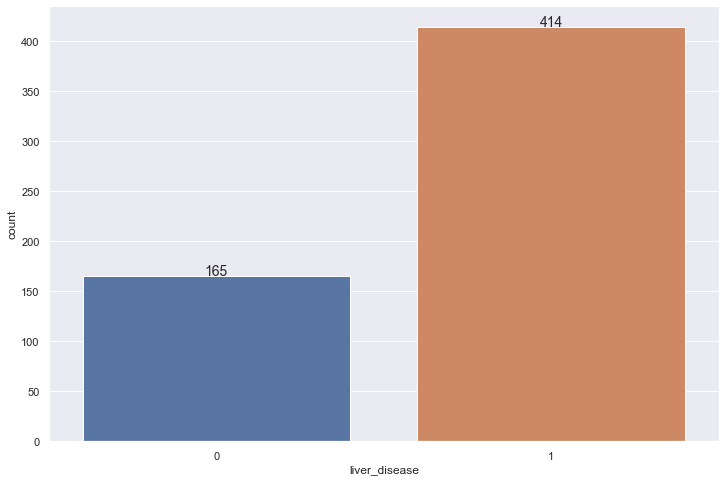

In [16]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df, x='liver_disease')
#avg for each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.75, rect.get_height(),
           horizontalalignment='center', fontsize=14)
plt.show()

### Liver disease vs Gender

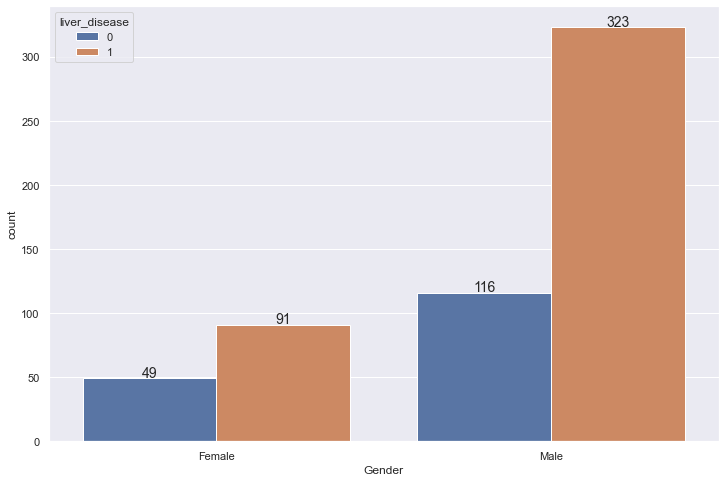

In [17]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df, x='Gender', hue='liver_disease')
#avg for each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.75, rect.get_height(),
           horizontalalignment='center', fontsize=14)

plt.show()

### Liver Disease vs Total Bilirubin

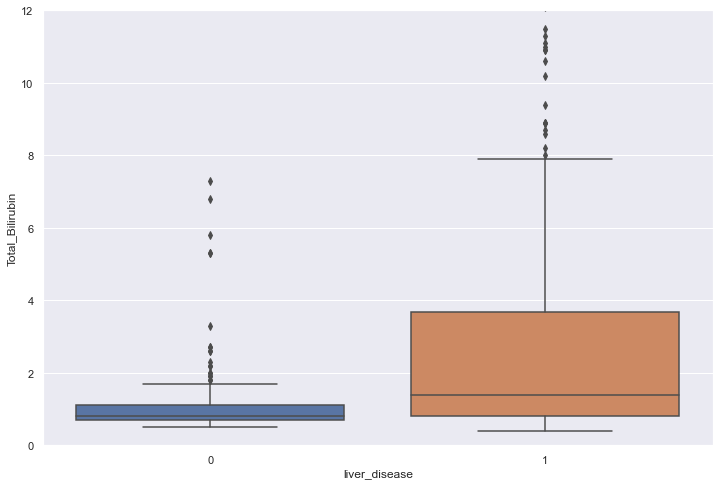

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='Total_Bilirubin', x='liver_disease')
plt.ylim([0,12])
plt.show()

### Albumin and Globulin Ratio vs Liver Disease

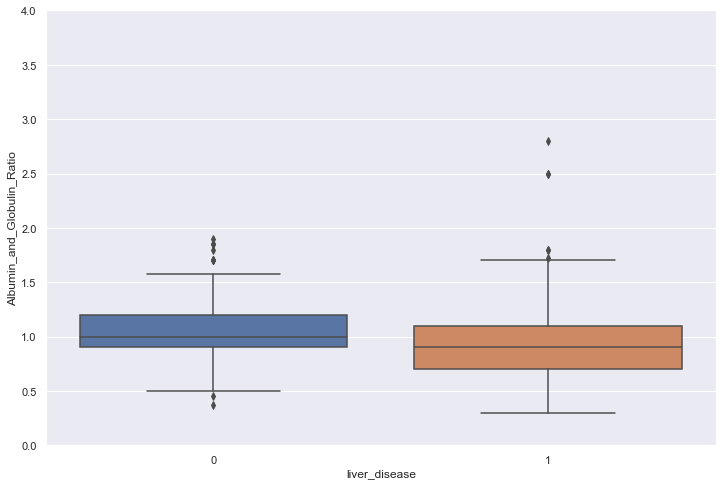

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='Albumin_and_Globulin_Ratio', x='liver_disease')
plt.ylim([0,4])
plt.show()

### Correlation

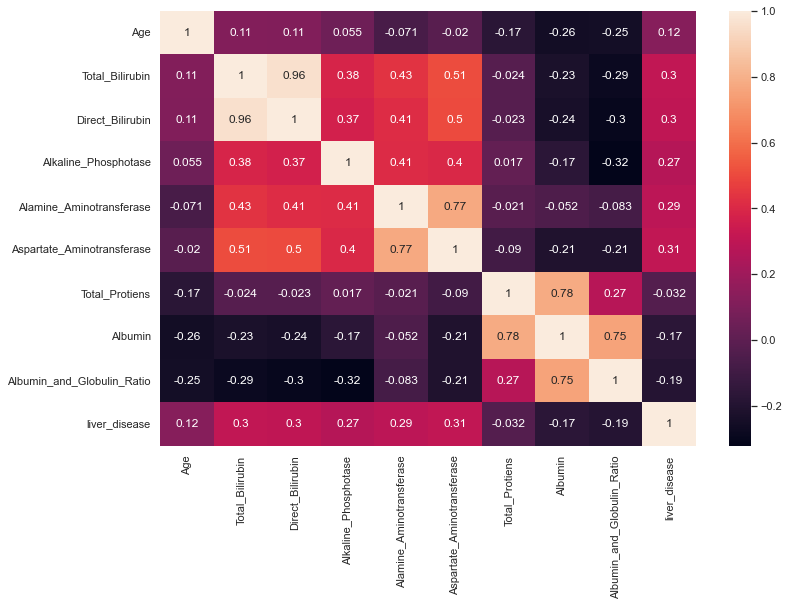

In [20]:
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

### Convert categorical to numerical 

In [21]:
from sklearn import preprocessing

In [22]:
label_encoding = preprocessing.LabelEncoder()
df['Gender'] = label_encoding.fit_transform(df['Gender'].astype(str))

In [23]:
df.sample(10).T

,480,559,12,473,389,352,72,104,555,57
Age,7.0,26.0,64.0,42.0,72.0,26.0,75.0,63.0,55.0,48.0
Gender,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
Total_Bilirubin,0.5,42.8,0.9,1.0,0.6,0.7,0.8,0.5,0.8,0.9
Direct_Bilirubin,0.1,19.7,0.3,0.3,0.1,0.2,0.2,0.1,0.2,0.2
Alkaline_Phosphotase,352.0,390.0,310.0,154.0,102.0,144.0,205.0,170.0,290.0,175.0
Alamine_Aminotransferase,28.0,75.0,61.0,38.0,31.0,36.0,27.0,21.0,139.0,24.0
Aspartate_Aminotransferase,51.0,138.0,58.0,21.0,35.0,33.0,24.0,28.0,87.0,54.0
Total_Protiens,7.9,7.5,7.0,6.8,6.3,8.2,4.4,5.5,7.0,5.5
Albumin,4.2,2.6,3.4,3.9,3.2,4.3,2.0,2.5,3.0,2.7
Albumin_and_Globulin_Ratio,1.1,0.5,0.9,1.3,1.0,1.1,0.8,0.8,0.7,0.9


### Save data for model

In [24]:
df.to_csv('../data/prepared_liver_diseased_data.csv', index=False)

____

## Machine Learning for Liver Diseases

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [26]:
df = pd.read_csv('../data/prepared_liver_diseased_data.csv')

In [27]:
df.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,0.0,1.00,1.00,1.0,1.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


### Define Inputs & Outputs for Models

In [28]:
X = df.drop(['liver_disease', 'Direct_Bilirubin', 'Alamine_Aminotransferase', 'Albumin'], axis=1)
y = df['liver_disease']

### Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 7), (116, 7), (463,), (116,))

### Standard Scaler

In [31]:
X_train_numerical = X_train.drop(['Gender'], axis=1)
X_test_numerical = X_test.drop(['Gender'], axis=1)

In [32]:
X_train_categorical = X_train[['Gender']]
X_test_categorical = X_test[['Gender']]

In [33]:
scaler = StandardScaler()

X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns=X_train_numerical.columns)
X_test_numerical =  pd.DataFrame(scaler.fit_transform(X_test_numerical), columns=X_test_numerical.columns)

In [34]:
X_train_numerical.describe()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
count,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02
mean,-5.275358e-17,1.906322e-17,9.441691e-17,-1.288866e-17,-7.380705e-16,3.705939e-16
std,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00
min,-2.524599e+00,-5.060483e-01,-8.824062e-01,-3.408658e-01,-3.520825e+00,-2.072940e+00
25%,-7.114950e-01,-4.310662e-01,-4.710689e-01,-2.880546e-01,-6.685136e-01,-6.953391e-01
50%,3.875480e-02,-3.935751e-01,-3.339565e-01,-2.317227e-01,1.595768e-01,7.355414e-02
75%,6.639629e-01,-1.123922e-01,9.847731e-03,-8.385150e-02,6.196270e-01,4.900380e-01
max,2.852191e+00,7.442056e+00,7.446661e+00,1.697767e+01,2.827868e+00,5.936365e+00


In [35]:
X_test_numerical.describe()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
count,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,-1.397350e-16,-7.321729e-17,5.072571e-17,-1.579197e-17,-4.287758e-16,-2.651136e-16
std,1.004338e+00,1.004338e+00,1.004338e+00,1.004338e+00,1.004338e+00,1.004338e+00
min,-2.502699e+00,-4.143487e-01,-9.667805e-01,-3.665233e-01,-2.378407e+00,-1.579129e+00
25%,-7.904600e-01,-3.805402e-01,-4.874593e-01,-3.093425e-01,-6.677235e-01,-7.133074e-01
50%,9.518095e-02,-3.354622e-01,-3.611023e-01,-2.586047e-01,-4.997685e-02,-1.360932e-01
75%,8.036937e-01,-1.523327e-01,8.375787e-02,-7.659275e-02,6.865673e-01,4.411211e-01
max,1.866463e+00,7.981435e+00,6.079972e+00,9.088433e+00,2.278453e+00,4.481621e+00


In [36]:
X_train_categorical.reset_index(drop=True, inplace=True)
X_train_numerical.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train_categorical, X_train_numerical], axis=1)

In [37]:
X_train.head()

,Gender,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,1,-0.398891,-0.412321,0.079427,-0.288055,-0.944544,0.169666
1,0,0.163796,-0.018665,0.005755,-0.140183,-0.852534,-1.528307
2,0,1.289171,-0.449812,-0.424000,-0.312700,0.251587,-0.150706
3,1,1.289171,0.899866,-0.035174,-0.122580,-0.484494,0.169666
4,0,-1.336703,-0.149883,0.893916,-0.221161,0.343597,-0.791451


In [38]:
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_numerical.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test_categorical, X_test_numerical], axis=1)

In [39]:
X_test.head()

,Gender,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,1,-0.377161,-0.256576,-0.265029,-0.224779,-1.903217,-1.001915
1,0,0.095181,-0.358001,-0.628436,-0.356859,1.898301,0.152514
2,0,-1.085674,-0.358001,-0.853999,-0.054043,0.472732,-0.424700
3,1,1.571249,-0.256576,6.079972,0.052265,-0.762761,-1.290522
4,1,-0.259075,2.966504,-0.039466,0.016829,-1.047875,-1.001915


### Def for Models & Metrics

In [40]:
def build_model(classifier, X_train, X_test, y_train, y_test):
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    result_dict = {'accuracy' : accuracy, 
                   'precision' : precision,
                   'recall' : recall}
    return result_dict

In [41]:
def performance_metrics_report():
    for key in report_log:
        print('-' * 50)
        print('Classifier model -', key)
        print('-' * 50)
        print()
        for score in report_log[key]:
            print(score, report_log[key][score])

In [42]:
report_log = dict()

## Models

### Logistic Regression()

In [43]:
report_log['Logistic Regression'] = build_model(LogisticRegression(), X_train, X_test, y_train, y_test)

### KNeighbors()

In [44]:
report_log['KNeighbors'] = build_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

### SGD()

In [45]:
report_log['SGD'] = build_model(SGDClassifier(), X_train, X_test, y_train, y_test)

### SVC()

In [46]:
report_log['SVC'] = build_model(SVC(), X_train, X_test, y_train, y_test)

### Random Forest()

In [47]:
report_log['Random Forest'] = build_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

## Performance Report

In [48]:
performance_metrics_report()

--------------------------------------------------
Classifier model - Logistic Regression
--------------------------------------------------

accuracy 0.7327586206896551
precision 0.7522935779816514
recall 0.9534883720930233
--------------------------------------------------
Classifier model - KNeighbors
--------------------------------------------------

accuracy 0.6810344827586207
precision 0.7692307692307693
recall 0.813953488372093
--------------------------------------------------
Classifier model - SGD
--------------------------------------------------

accuracy 0.7758620689655172
precision 0.7941176470588235
recall 0.9418604651162791
--------------------------------------------------
Classifier model - SVC
--------------------------------------------------

accuracy 0.7413793103448276
precision 0.7413793103448276
recall 1.0
--------------------------------------------------
Classifier model - Random Forest
--------------------------------------------------

accuracy 0.7672413793